In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fish.csv to Fish.csv


Grado 1 - MSE: 18769.926693773006
Grado 2 - MSE: 1.2213645589718399e+63
Grado 3 - MSE: 3316.3950467271084
Grado 4 - MSE: 7994.363094077428


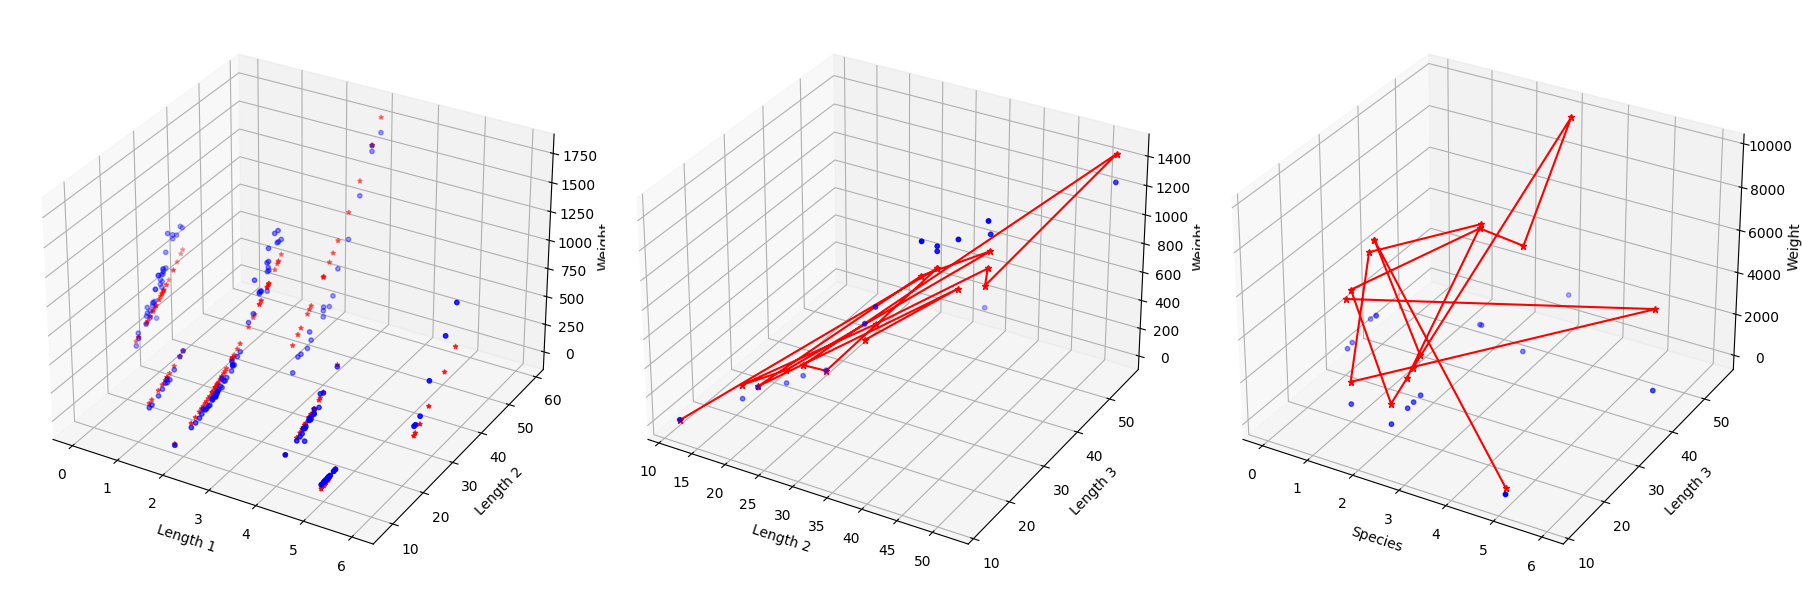

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Lectura de datos y mapeo de las especies a valores numéricos
df = pd.read_csv('Fish.csv')
species_dict = {'Bream': 0, 'Parkki': 1, 'Perch': 2, 'Pike': 3, 'Roach': 4, 'Smelt': 5, 'Whitefish': 6}
df['Species'] = df['Species'].map(species_dict)

# Separación de datos
X = df.iloc[:, [0, 2, 3, 4, 5, 6]].values
Y = df.iloc[:, 1].values

############ Funciones para el modelo de regresión polinomial por gradiente descendente ############

# Esta función crea una matriz de características polinomiales
def polynomial_features(X, degree):
    # Expande las características a un grado polinomial dado
    polyn = np.column_stack([X ** d for d in range(1, degree + 1)])
    return polyn

def gradient_descent(X, y, coefficients, learning_rate, iterations):
    # Calcula el gradiente descendente para ajustar los coeficientes del modelo
    m = len(y)
    for _ in range(iterations):
        predictions = np.dot(X, coefficients)
        error = predictions - y
        gradient = (2/m) * X.T.dot(error)
        coefficients -= learning_rate * gradient
    return coefficients

def polynomial_Rfit(X, y, degree, learning_rate, iterations):
    # Realiza la regresión polinomial ajustando los coeficientes del modelo
    polyn = polynomial_features(X, degree)
    initial_coefficients = np.zeros(polyn.shape[1])

    # Gradiente descendente para ajustar los coeficientes
    fitted_coefficients = gradient_descent(polyn, y, initial_coefficients, learning_rate, iterations)
    return fitted_coefficients

def polynomial_Rpredict(X, coefficients, degree):
    # Realiza predicciones usando las características polinomiales y los coeficientes del modelo
    polyn = polynomial_features(X, degree)
    predictions = np.dot(polyn, coefficients)
    return predictions

############ Funciones para el modelo de regresión polinomial por gradiente descendente ############

# División en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Entrenamiento y evaluación para diferentes grados polinomiales

degrees = [1, 2, 3, 4]
learning_rates = [0.000341, 0.00000024, 0.000000000013, 0.00000000000001]
iterations = 30000

# Realización de la regresión polinomial y evaluación del error cuadrático medio (MSE)
for i, degree in enumerate(degrees):
    coefficients = polynomial_Rfit(X_train, Y_train, degree, learning_rates[i], iterations)
    predictions = polynomial_Rpredict(X_val, coefficients, degree)
    print(f'Grado {degree} - MSE: {mean_squared_error(Y_val, predictions)}')

# Visualización de gráficos
fig = plt.figure(figsize=(18, 6))

# Gráfico 1: Longitudes 1 y 2 vs. Peso
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X[:, 0], X[:, 1], Y, c='b', marker='o', s=10)
coefficients = polynomial_Rfit(X_train[:, :2], Y_train, 2, learning_rates[1], iterations)
predicted_values = polynomial_Rpredict(X[:, :2], coefficients, 2)
ax1.scatter(X[:, 0], X[:, 1], predicted_values, c='r', marker='*', s=10)
ax1.set_xlabel('Length 1')
ax1.set_ylabel('Length 2')
ax1.set_zlabel('Weight')

# Gráfico 2: Longitudes 2 y 3 vs. Peso
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_test[:, 1], X_test[:, 2], Y_test, c='b', marker='o', s=10)
coefficients = polynomial_Rfit(X_train[:, 1:3], Y_train, 2, learning_rates[1], iterations)
ax2.plot(X_test[:, 1], X_test[:, 2], polynomial_Rpredict(X_test[:, 1:3], coefficients, 2), c='r', marker='*', markersize=5)
ax2.set_xlabel('Length 2')
ax2.set_ylabel('Length 3')
ax2.set_zlabel('Weight')

# Gráfico 3: Especies, Longitud 3 vs. Peso
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X_test[:, 0], X_test[:, 2], Y_test, c='b', marker='o', s=10)
ax3.plot(X_test[:, 0], X_test[:, 2], polynomial_Rpredict(X_test[:, [0, 2]], coefficients, 2), c='r', marker='*', markersize=5)
ax3.set_xlabel('Species')
ax3.set_ylabel('Length 3')
ax3.set_zlabel('Weight')

plt.tight_layout()
plt.show()
